# SC1015 MINI PROJECT : Sleep Disorder & Stress Analysis
_Team 1 : Jervis, Jun Chao & Yu Xuan_

In [95]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
sb.set() # set the default Seaborn style for graphics

## Importing the Sleep Data Set

In [96]:
sleepData = pd.read_csv("sleepData.csv")

## Cleaning & Encoding Columns in Data Set

In [97]:
# Replace 'Normal Weight' with 'Normal' in the 'BMI Category' column
sleepData["BMI Category"] = sleepData["BMI Category"].replace("Normal Weight", "Normal")
# Extract the value before '/' symbol
sleepData['Blood Pressure'] = sleepData['Blood Pressure'].str.split('/').str[0]


# initiate Label Encoder
label_encoder = LabelEncoder()
sleepData["BMI Category"] = label_encoder.fit_transform(sleepData["BMI Category"])
# Normal: 0 Obese: 1, Overweight: 2

# Replace NaN with 0 and map 'Sleep Apnea' and 'Insomnia' to 1
sleepData["Sleep Disorder"] = sleepData["Sleep Disorder"].fillna(0)
sleepData["Sleep Disorder"] = sleepData["Sleep Disorder"].replace(['Sleep Apnea', 'Insomnia'], 1)
# Convert column to integer type
sleepData["Sleep Disorder"] = sleepData["Sleep Disorder"].astype(int)

sleepData.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,2,126,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,0,125,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,0,125,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,1,140,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,1,140,85,3000,1


In [98]:
sleepDuration = pd.DataFrame(sleepData["Sleep Duration"])
sleepQuality = pd.DataFrame(sleepData["Quality of Sleep"])
physicalActivity = pd.DataFrame(sleepData["Physical Activity Level"])
stressLevel = pd.DataFrame(sleepData["Stress Level"])
bmiCategory = pd.DataFrame(sleepData["BMI Category"])
bloodPressure = pd.DataFrame(sleepData["Blood Pressure"])
heartRate = pd.DataFrame(sleepData["Heart Rate"])
dailySteps = pd.DataFrame(sleepData["Daily Steps"])
sleepDisorder = pd.DataFrame(sleepData["Sleep Disorder"])

## Box Plots & Violin Plots Before Removing Outliers

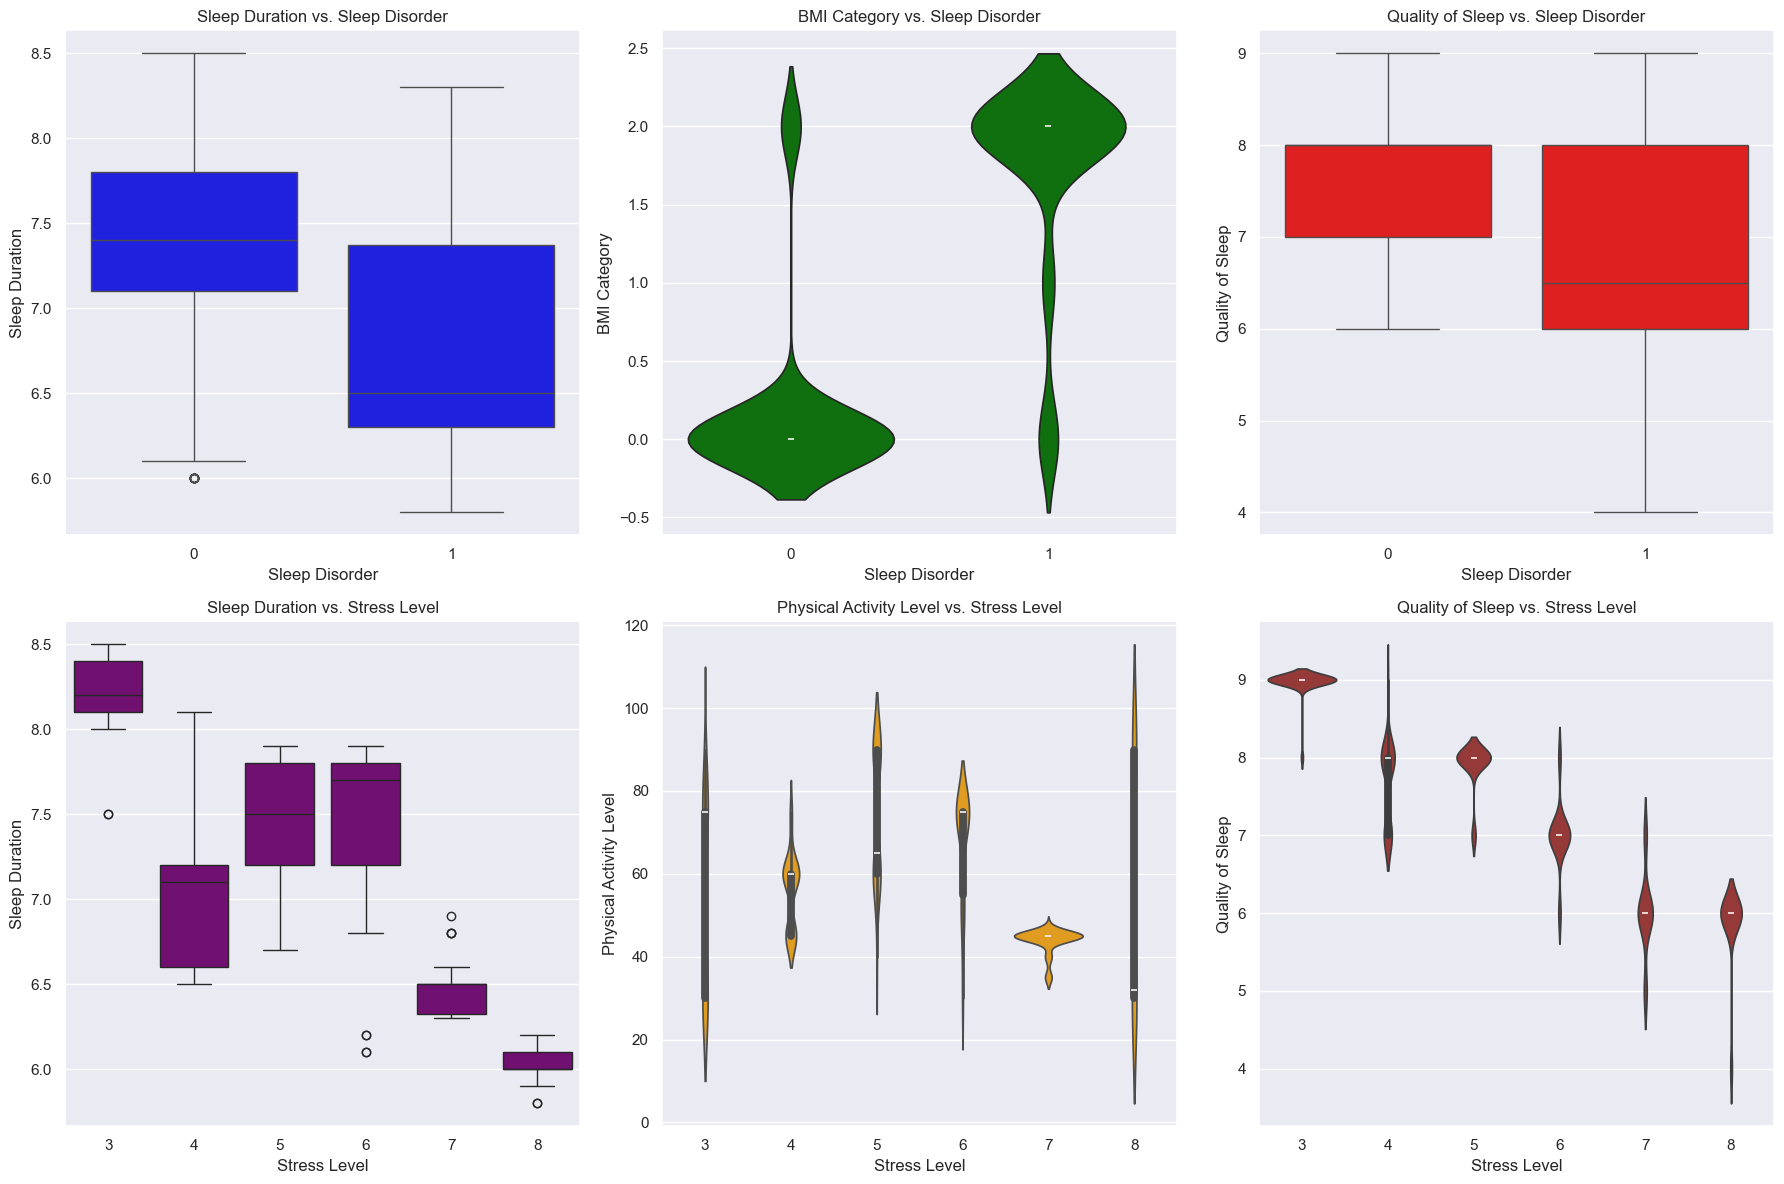

In [99]:
# Create legend: mapping the numeric values to BMI categories
legend_labels = {
    0: "Normal",
    1: "Obese",
    2: "Overweight"
}

# Initial plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting graphs related to sleep
sb.boxplot(data=sleepData, y="Sleep Duration", x="Sleep Disorder", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Sleep Duration vs. Sleep Disorder")

sb.violinplot(data=sleepData, y="BMI Category", x="Sleep Disorder", ax=axes[0, 1], color="green")
axes[0, 1].set_title("BMI Category vs. Sleep Disorder")

sb.boxplot(data=sleepData, y="Quality of Sleep", x="Sleep Disorder", ax=axes[0, 2], color="red")
axes[0, 2].set_title("Quality of Sleep vs. Sleep Disorder")

# Plotting graphs related to stress
sb.boxplot(data=sleepData, y="Sleep Duration", x="Stress Level", ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Sleep Duration vs. Stress Level")

sb.violinplot(data=sleepData, y="Physical Activity Level", x="Stress Level", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Physical Activity Level vs. Stress Level")

sb.violinplot(data=sleepData, y="Quality of Sleep", x="Stress Level", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Quality of Sleep vs. Stress Level")

plt.tight_layout()
plt.show()



## Box Plots & Violin Plots After Removing Outliers

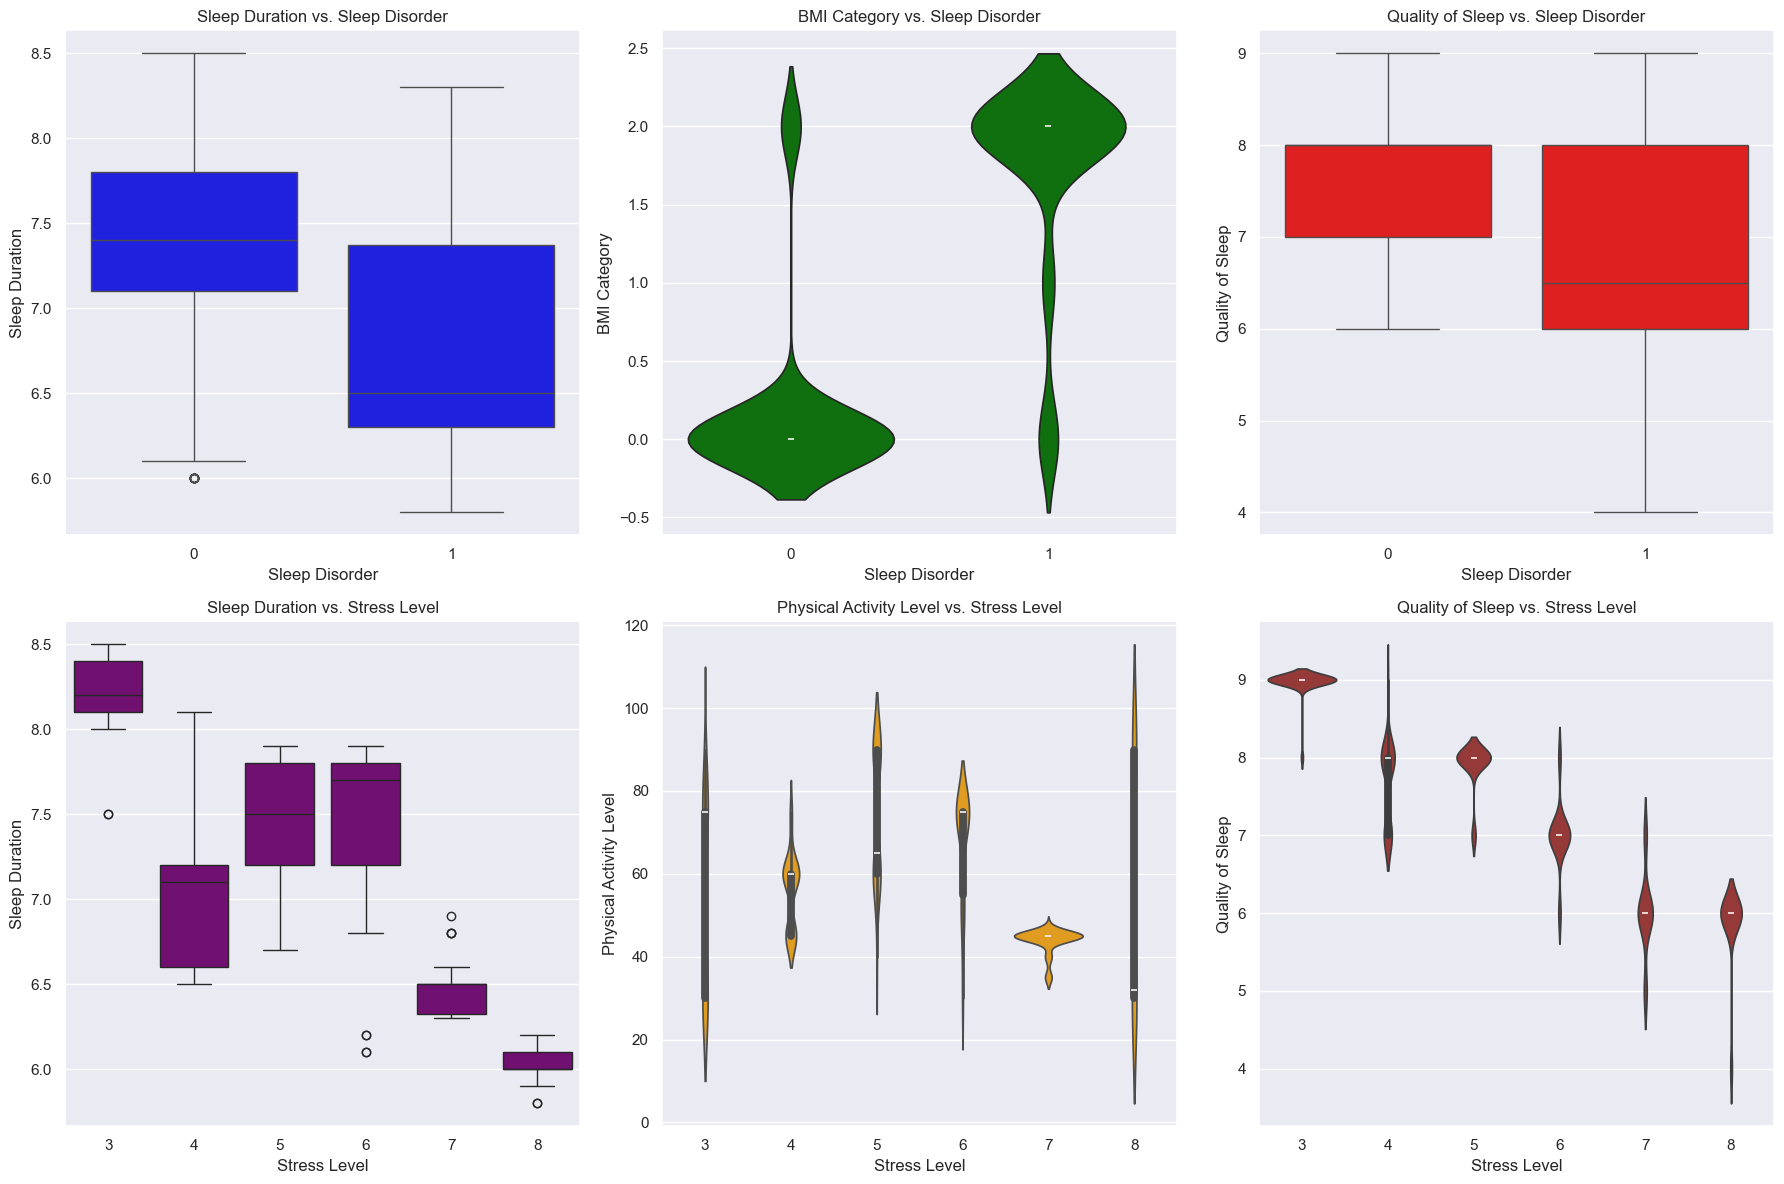

In [100]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for each column
clean_data = remove_outliers(sleepData, "Sleep Duration")
clean_data = remove_outliers(clean_data, "Quality of Sleep")
clean_data = remove_outliers(clean_data, "BMI Category")
clean_data = remove_outliers(clean_data, "Physical Activity Level")
clean_data = remove_outliers(clean_data, "Stress Level")

# Recreating the plots without outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting the graphs related to sleep without outliers
sb.boxplot(data=clean_data, y="Sleep Duration", x="Sleep Disorder", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Sleep Duration vs. Sleep Disorder")

sb.violinplot(data=clean_data, y="BMI Category", x="Sleep Disorder", ax=axes[0, 1], color="green")
axes[0, 1].set_title("BMI Category vs. Sleep Disorder")

sb.boxplot(data=clean_data, y="Quality of Sleep", x="Sleep Disorder", ax=axes[0, 2], color="red")
axes[0, 2].set_title("Quality of Sleep vs. Sleep Disorder")

# Plotting graphs related to stress
sb.boxplot(data=clean_data, y="Sleep Duration", x="Stress Level", ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Sleep Duration vs. Stress Level")

sb.violinplot(data=clean_data, y="Physical Activity Level", x="Stress Level", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Physical Activity Level vs. Stress Level")

sb.violinplot(data=clean_data, y="Quality of Sleep", x="Stress Level", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Quality of Sleep vs. Stress Level")

plt.tight_layout()
plt.show()


## Function to Display ROC AUC for Data 
### (Receiver Operating Characteristic Area Under the Curve)

In [101]:
from sklearn.metrics import roc_curve, auc

def getRocCurve(y_test, y_pred):
    # Compute ROC curve 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Compute Area Under the ROC Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    ## more right angle the top, better the model

### ROC (Receiver Operating Characteristic) curve: 
A graphical representation which we use to assess the performance of our binary classification models
### AUC (Area under Curve):
Measures 2-dimensional area under the entire ROC curve from (0,0) to (1,1)
#### Interpretation of AUC: 
- AUC = 1: A perfect model, all predictions are correct.
- AUC = 0.5: Similarly to random guessing
- AUC > 0.5: The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
- AUC < 0.5: The model is worse than random guessing.

## Function to Display Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix
def displayConfusionMatrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 3))
    sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

### Interpreting Confusion Matrix
- True Positives (TP): Cases in which the model correctly predicts the positive class.
- True Negatives (TN): Cases in which model correctly predicts the negative class.
- False Positives (FP): Cases in which the model incorrectly predicts the positive class.
- False Negatives (FN): Cases in which the model incorrectly predicts the negative class.

## Function to Display Feature Importance 

In [103]:
def displayFeatureImportantRF(predictorData, feature_importances):
    # Create a DataFrame of feature importances
    feature_importance_df = pd.DataFrame({'Feature': predictorData.columns, 'Importance': feature_importances})

    # Sort features by importance (descending order)
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df)

    # Get feature names and importances from the DataFrame 
    features = feature_importance_df['Feature'].to_numpy()
    importances = feature_importance_df['Importance'].to_numpy()


    # Create a bar chart with this data
    plt.figure(figsize=(8, 4))  # Adjust the figure size as desired
    plt.barh(features, importances, color='skyblue')  # Bar plot with horizontal bars
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Ranking (Random Forest)')
    plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top

    # Display grid lines and labels
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Show the plot
    plt.tight_layout()
    plt.show()


def displayFeatureImportantGB(predictorData, feature_importances):
    # Sort feature importances in descending order
    sorted_indices = feature_importances.argsort()[::-1]

    # Print feature names and their importances
    for idx in sorted_indices:
        print(f"{predictorData.columns[idx]}: {feature_importances[idx]}")

    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

    # Sort feature importances in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(8, 4))
    sb.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()


### Feature importance 
A technique used to identify which features (variables) in our dataset have the most significant influence on the predictions of the model.

# Problem 1:  Sleep Disorder Analysis
### Predictors: "Quality of Sleep", "Sleep Duration", "BMI Category"

## Split Dataset into Training & Test Sets

In [104]:
from sklearn.model_selection import train_test_split, cross_val_score

# Combine variables into a single DataFrame
X = pd.concat([sleepDuration, sleepQuality, bmiCategory], axis=1)
y = sleepDisorder.values.ravel()  # Flatten sleepDisorder into a 1D array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Scale Training & Test Sets

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1 : Logistic Regression 

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
    
def logisticRegression(X_train_scaled, X_test_scaled, y_train, y_test):
    # Initialize logistic regression model
    log_reg_model = LogisticRegression()
    
    # Fit the logistic regression model to your training data with selected features
    log_reg_model.fit(X_train_scaled, y_train)
    
    logisticRegression_scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=5)

    # Check model performance
    print("Logistic Regression Cross-Validation Scores:", logisticRegression_scores)
    
    # Make predictions on the test data
    y_pred = log_reg_model.predict(X_test_scaled)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification report: ", report)
    # Fit the logistic regression model to our training data with selected features
    log_reg_model.fit(X_train_scaled, y_train)

    return y_pred

## Confusion Matrix : Logistic Regression

Logistic Regression Cross-Validation Scores: [0.88333333 0.81666667 0.93333333 0.94915254 0.88135593]
Accuracy: 0.8933333333333333
Classification report:                precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.91      0.85      0.88        34

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



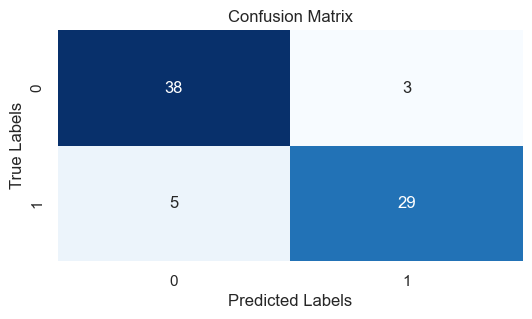

In [107]:
y_pred = logisticRegression(X_train_scaled, X_test_scaled, y_train, y_test)

# Plotting the confusion matrix
displayConfusionMatrix(y_test, y_pred)


### RESULTS
- True Positive Rate = 29 / (29 + 5) = 0.853 (3dp)
- True Negative Rate = 38 / (38 + 3) = 0.927 (3dp)


## ROC AUC : Logistic Regression

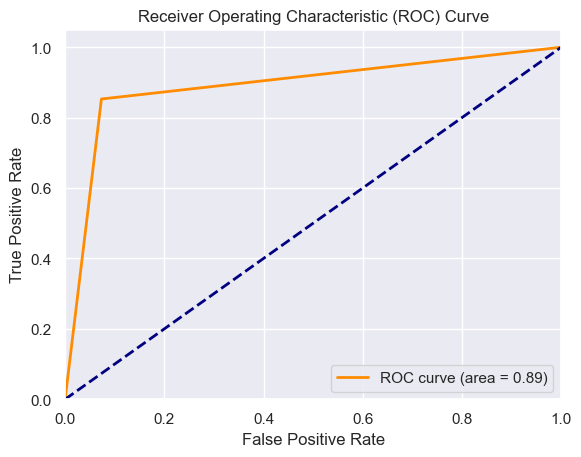

In [108]:
getRocCurve(y_test, y_pred)

# Model 2: Gradient Boosting 

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

def gradientBoosting(X_train_scaled, X_test_scaled, y_train, y_test):
    # Assuming X_train, X_test, y_train, y_test are your train-test split data
    # Initialize Gradient Boosting Classifier
    gb_model = GradientBoostingClassifier()
    
    # Fit the model to your training data
    gb_model.fit(X_train_scaled, y_train)
    
    # Get feature importances
    feature_importances = gb_model.feature_importances_
    
    # Evaluate the model that used all features using cross-validation
    gradientBoosting_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5)

    # Check model performance
    print("Gradient Boosting Cross-Validation Scores:", gradientBoosting_scores)
    
    # Make predictions on the test data
    y_pred = gb_model.predict(X_test_scaled)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification report: ", report)
    return y_pred, feature_importances

## Confusion Matrix : Gradient Boosting

Gradient Boosting Cross-Validation Scores: [0.9        0.83333333 0.93333333 0.94915254 0.91525424]
Accuracy: 0.9333333333333333
Classification report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.91      0.94      0.93        34

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



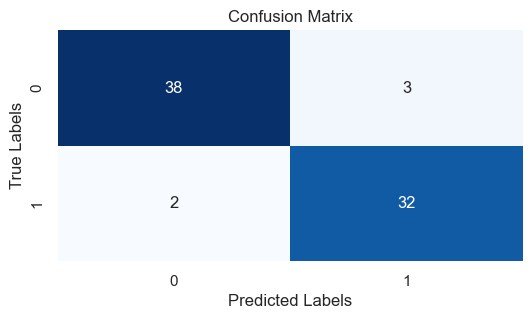

In [110]:
y_pred, feature_importances = gradientBoosting(X_train_scaled, X_test_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)

### RESULTS
- True Positive Rate = 32 / (32 + 2) = 0.941 (3dp)
- True Negative Rate = 38 / (38 + 3) = 0.927 (3dp)

## ROC AUC : Gradient Boosting

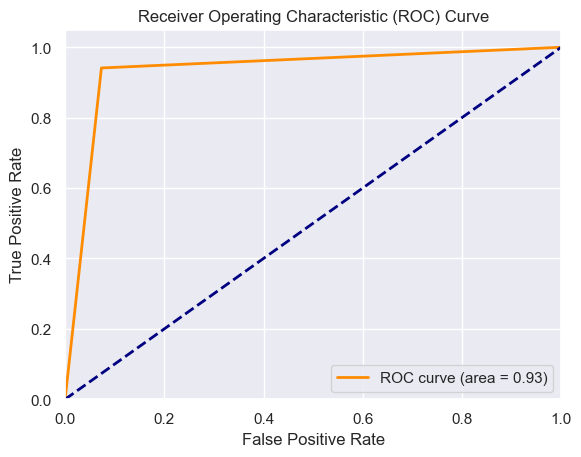

In [111]:
getRocCurve(y_test, y_pred)

## Feature Importance : Gradient Boosting

BMI Category: 0.8623168012551995
Sleep Duration: 0.083913572612361
Quality of Sleep: 0.05376962613243946


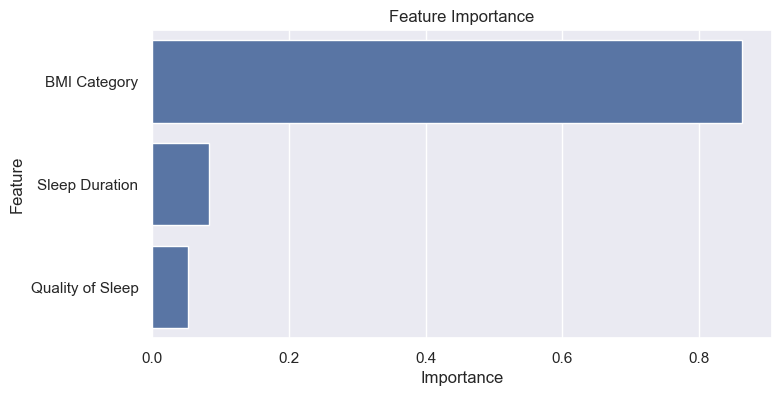

In [112]:
displayFeatureImportantGB(X, feature_importances)

### RESULTS
BMI category has the most significant influence on the predictions of the Gradient Boosting model.

# Model 3 : Random Forest 

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Function for random tree model

def random_forest_train_evaluate(X_train_scaled, X_test_scaled, y_train, y_test):
    # Initialize model
    random_forest = RandomForestClassifier()
    
    # Train the model   
    random_forest.fit(X_train_scaled, y_train)
    
    # Get feature importances
    feature_importances = random_forest.feature_importances_

    # Evaluate the model that used all features using cross-validation
    random_forest_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5)

    # Check model performance
    print("Random Forest Cross-Validation Scores:", random_forest_scores)

    # Make predictions on the testing data
    y_pred = random_forest.predict(X_test_scaled)

    # Evaluate the models on the test data
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    return y_pred, feature_importances


## Confusion Matrix : Random Forest

Random Forest Cross-Validation Scores: [0.93333333 0.83333333 0.93333333 0.94915254 0.89830508]
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.91      0.94      0.93        34

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



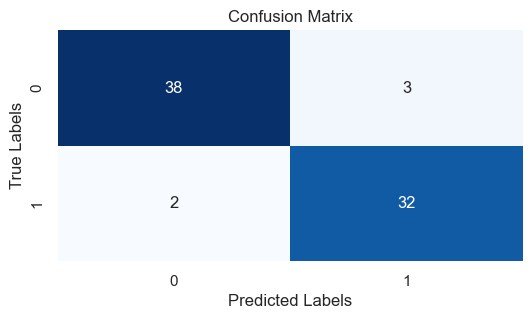

In [114]:
# Put data into function
y_pred, feature_importances = random_forest_train_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)

### RESULTS
- True Positive Rate = 32 / (32 + 2) = 0.941 (3dp)
- True Negative Rate = 38 / (38 + 3) = 0.927 (3dp)

## ROC AUC : Random Forest

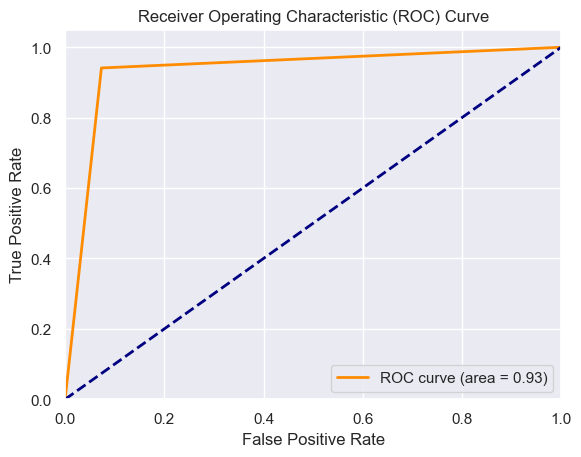

In [115]:
getRocCurve(y_test, y_pred)

## Feature Importance : Random Forest

            Feature  Importance
2      BMI Category    0.532771
0    Sleep Duration    0.321036
1  Quality of Sleep    0.146193


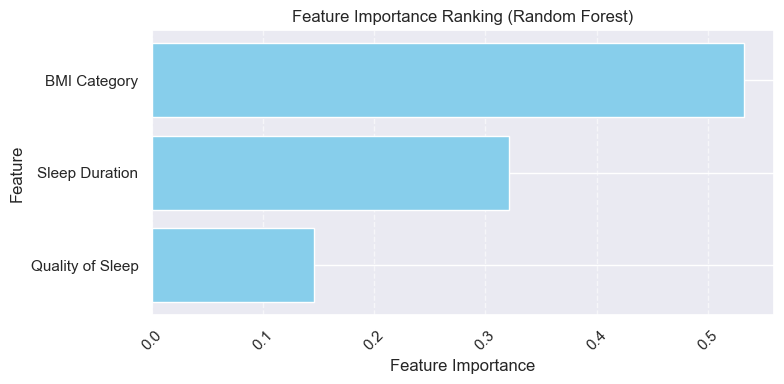

In [116]:
displayFeatureImportantRF(X, feature_importances)

### RESULTS
BMI Category has the most significant influence on the predictions of the Random Forest model.

# Problem 2 : Stress Level Analysis

## Split Dataset into Training & Test Sets

In [117]:
# Combine variables into a single DataFrame
X = pd.concat([sleepDuration, sleepQuality, physicalActivity], axis=1)

y = stressLevel.values.ravel()  # Flatten sleepDisorder into a 1D array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale Training & Test Sets

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1 : Logistic Regression

## Confusion Matrix : Logistic Regression

Logistic Regression Cross-Validation Scores: [0.83333333 0.85       0.83333333 0.77966102 0.77966102]
Accuracy: 0.7866666666666666
Classification report:                precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.45      0.90      0.60        10
           5       0.80      0.29      0.42        14
           6       0.80      0.80      0.80        10
           7       0.92      0.85      0.88        13
           8       0.94      0.94      0.94        18

    accuracy                           0.79        75
   macro avg       0.82      0.80      0.77        75
weighted avg       0.83      0.79      0.78        75



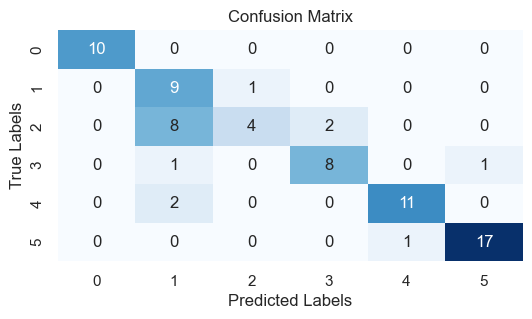

In [119]:
y_pred = logisticRegression(X_train_scaled, X_test_scaled, y_train, y_test)

displayConfusionMatrix(y_test, y_pred)


# Model 2 : Gradient Boosting

## Confusion Matrix : Gradient Boosting

Gradient Boosting Cross-Validation Scores: [0.86666667 0.91666667 0.9        0.89830508 0.84745763]
Accuracy: 0.9066666666666666
Classification report:                precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.60      0.90      0.72        10
           5       0.91      0.71      0.80        14
           6       1.00      1.00      1.00        10
           7       1.00      0.85      0.92        13
           8       1.00      1.00      1.00        18

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.93      0.91      0.91        75



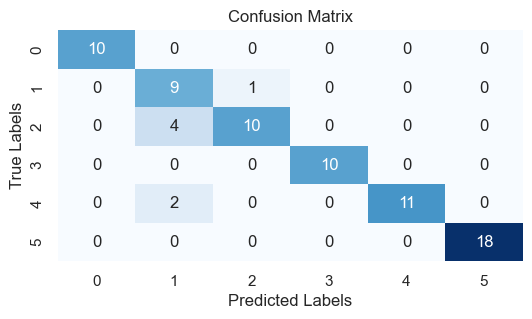

In [120]:
y_pred, feature_importances = gradientBoosting(X_train_scaled, X_test_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)

## Feature Importance : Gradient Boosting

Sleep Duration: 0.5049548435136527
Quality of Sleep: 0.28832256545711
Physical Activity Level: 0.20672259102923735


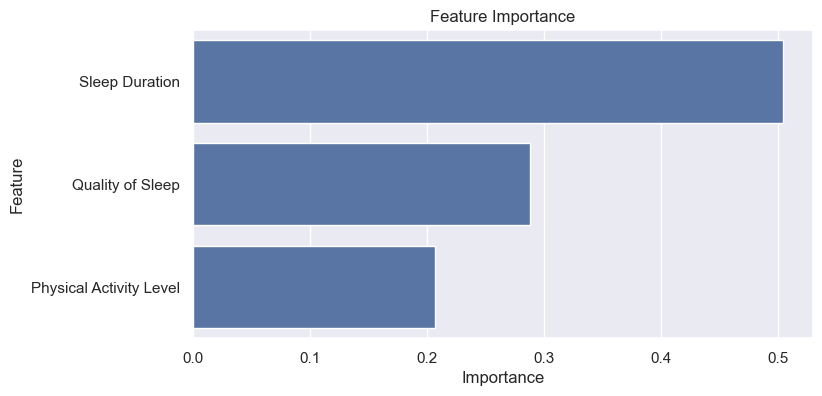

In [121]:
displayFeatureImportantGB(X, feature_importances)

### RESULTS
Sleep Duration has the most significant influence on the predictions of the Gradient Boosting model.

# Model 3 : Random Forest

## Confusion Matrix : Random Forest

Random Forest Cross-Validation Scores: [0.88333333 0.9        0.88333333 0.86440678 0.84745763]
Accuracy: 0.9066666666666666
Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.60      0.90      0.72        10
           5       0.91      0.71      0.80        14
           6       1.00      1.00      1.00        10
           7       1.00      0.85      0.92        13
           8       1.00      1.00      1.00        18

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.93      0.91      0.91        75



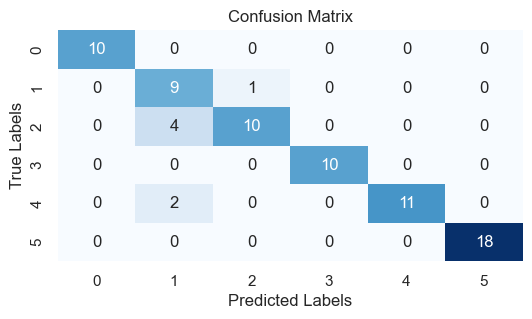

In [122]:
# Put data into function
y_pred, feature_importances = random_forest_train_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)


## Feature Importance : Random Forest

                   Feature  Importance
0           Sleep Duration    0.375035
1         Quality of Sleep    0.331886
2  Physical Activity Level    0.293079


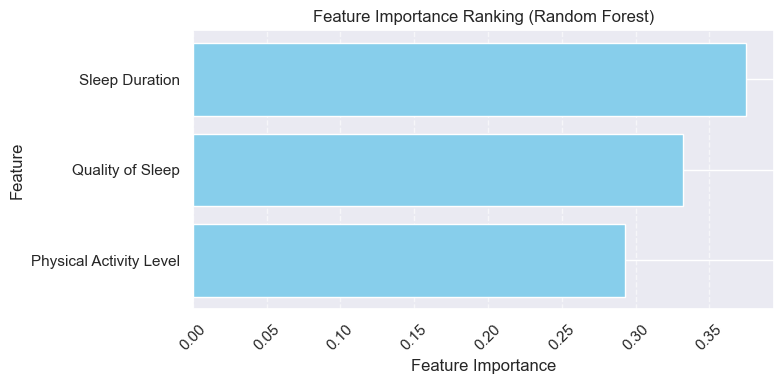

In [123]:
displayFeatureImportantRF(X, feature_importances)

### RESULTS
Sleep Duration has the most significant influence on the predictions of the Random Forest model.

_You have reached the end of the code. Our insights and conclusions can be found on our README.md_